<img src="https://png.oyepandeyji.com/wp-content/uploads/2021/09/great_learning_logo_png.png" width=500px>

# CNN for Image Classification

### 1. Import required libraries.

In [ ]:
# DATA MANIPULATION
import numpy as np  
import pandas as pd 

# Import dataset from keras
from keras.datasets import cifar10

# VISUALIZATION
import matplotlib.pyplot as plt 
import seaborn as sns

# MISC
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataset

#### About Dataset: 
- https://www.tensorflow.org/datasets/catalog/cifar10
- https://github.com/wichtounet/cifar-10/blob/master/LICENSE 

In [ ]:
# loading the dataset 
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
# DATA SET SHAPE AND SIZE

print('\nTraining data : ', train_X.shape, train_Y.shape)  # TRAIN

print('\nTesting data : ', test_X.shape, test_Y.shape) # TEST

print('\nTraining data =',round(100*train_X.shape[0]/(train_X.shape[0]+test_X.shape[0]),2),"% of total data")

print('\nTesting data =',round(100*test_X.shape[0]/(train_X.shape[0]+test_X.shape[0]),2),"% of total data")


Training data :  (50000, 32, 32, 3) (50000, 1)

Testing data :  (10000, 32, 32, 3) (10000, 1)

Training data = 83.33 % of total data

Testing data = 16.67 % of total data


### 3. Analyze the labels.

In [ ]:
# ANALYZE LABELS

Labels = np.unique(train_Y)  # DISPLAY UNIQUE LABELS

NumberOfLabels = len(Labels)  # LENGTH OF UNIQUES LABELS

print('\nLabels : ', Labels)

print('\nTotal number of labels : ', NumberOfLabels)


Labels :  [0 1 2 3 4 5 6 7 8 9]

Total number of labels :  10


### 4. Visualize the images and their labels.

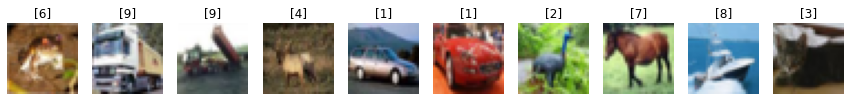

In [ ]:
# visualizing the first 10 images in the dataset and their labels

N=10 # NUMBER OF IMAGES YOU WISH TO SEE

plt.figure(figsize=(15,15))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(train_X[i])  
    plt.title("{}".format(train_Y[i]))
    plt.axis('off')
plt.show()

In [ ]:
train_X[0][0:8,1:3]

array([[[ 43,  46,  45],
        [ 50,  48,  43]],

       [[  0,   0,   0],
        [ 18,   8,   0]],

       [[ 16,   7,   0],
        [ 49,  27,   8]],

       [[ 38,  20,   4],
        [ 87,  54,  25]],

       [[ 59,  32,  11],
        [102,  65,  34]],

       [[ 84,  53,  24],
        [110,  73,  37]],

       [[111,  75,  36],
        [123,  85,  43]],

       [[119,  76,  33],
        [130,  90,  47]]], dtype=uint8)

In [ ]:
train_X = train_X.astype('float32')
train_X = train_X.reshape(train_X.shape[0],32,32,3)
#normalization
train_X = train_X / 255.

test_X = test_X.astype('float32')
test_X = test_X.reshape(test_X.shape[0], 32,32,3)
#normalization
test_X = test_X / 255.

print('\nTraining data : ', train_X.shape)  # TRAIN

print('\nTesting data : ', test_X.shape) # TEST


Training data :  (50000, 32, 32, 3)

Testing data :  (10000, 32, 32, 3)


### 5. CNN model 1 : Building a Basic CNN model.

1. Input shape: 32 x 32 , 3 channel

2. Layer 1: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: 0
    - Stride: 1
    
    
3. Layer 2: Convolution
    - Number of Filters: 64
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: same
    - Stride: 1
    
    
4. Layer 3: Neural network
    - Dense layer units: 64 
    - Softmax output units: 10 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape = (32, 32, 3)))

model_1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (32, 32, 3))) 
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Flatten()) 

# fully connected layer
model_1.add(Dense(units = 64,activation = 'relu'))

# Classification layer
model_1.add(Dense(units = 10, activation = 'softmax')) 

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model_1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 32, 32, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                      

In [ ]:
MODEL1 = model_1.fit(train_X, train_Y, epochs = 15, validation_data = (test_X, test_Y), initial_epoch=0)

Epoch 1/15
1563/1563 [==============================] - 85s 54ms/step - loss: 1.2976 - accuracy: 0.5399 - val_loss: 1.0110 - val_accuracy: 0.6503
Epoch 2/15
1563/1563 [==============================] - 82s 53ms/step - loss: 0.9207 - accuracy: 0.6805 - val_loss: 0.9021 - val_accuracy: 0.6919
Epoch 3/15
1563/1563 [==============================] - 82s 52ms/step - loss: 0.7878 - accuracy: 0.7261 - val_loss: 0.8533 - val_accuracy: 0.7035
Epoch 4/15
1563/1563 [==============================] - 84s 54ms/step - loss: 0.6921 - accuracy: 0.7592 - val_loss: 0.8212 - val_accuracy: 0.7158
Epoch 5/15
1563/1563 [==============================] - 84s 54ms/step - loss: 0.6171 - accuracy: 0.7850 - val_loss: 0.8572 - val_accuracy: 0.7117
Epoch 6/15
1563/1563 [==============================] - 85s 54ms/step - loss: 0.5554 - accuracy: 0.8047 - val_loss: 0.8879 - val_accuracy: 0.7143
Epoch 7/15
1563/1563 [==============================] - 85s 54ms/step - loss: 0.5040 - accuracy: 0.8218 - val_loss: 0.8604 -

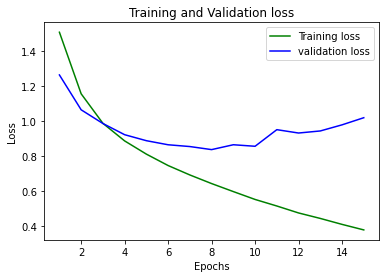

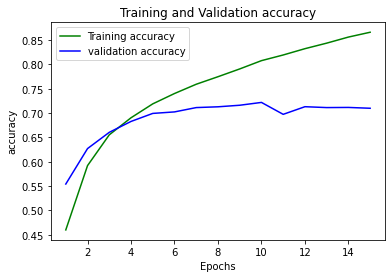

In [ ]:
# Accuracy and Loss plots 

EPOCH=15
epochs = range(1,EPOCH+1)

loss_train = MODEL1.history['loss']
loss_val = MODEL1.history['val_loss']
Acc_train = MODEL1.history['accuracy']
Acc_val = MODEL1.history['val_accuracy']

# Loss Vs Epochs
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### We can observe that model 1 is performing very good on training data with accuracy above 90%, but it is not performing good with the validation data. Hence it results as overfitted model.

### 6. CNN model 2: Reducing the number of trainable parameters and see if the overfitting reduces.




1. Input shape: 32 x 32 , 3 channel

2. Layer 1: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 3
    - Padding: 0
    - Stride: 1
    
    
3. Layer 2: Convolution
    - Number of Filters: 64
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 3
    - Padding: same
    - Stride: 1
    
4. Layer 3: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 3
    - Padding: same
    - Stride: 1

4. Layer 4: Neural network
    - Dense layer units: 64 
    - Dense layer units: 32 
    - Dense layer units: 16 
    - Softmax output units: 10 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model_2 = Sequential()

model_2.add(BatchNormalization(input_shape = (32, 32, 3)))

model_2.add(Convolution2D(filters = 64, kernel_size = 3, activation ='relu', input_shape = (32, 32, 3))) 
model_2.add(MaxPooling2D(pool_size = 3))

model_2.add(Convolution2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model_2.add(MaxPooling2D(pool_size = 3))

model_2.add(Convolution2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model_2.add(MaxPooling2D(pool_size = 3))

model_2.add(Flatten()) 

# fully connected layer
model_2.add(Dense(units = 64,activation = 'relu'))
model_2.add(Dense(units = 32,activation = 'relu'))
model_2.add(Dense(units = 16,activation = 'relu'))

# Classification layer
model_2.add(Dense(units = 10, activation = 'softmax')) 

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam()
model_2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 32, 32, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                      

In [ ]:
MODEL_2 = model_2.fit(train_X, train_Y, batch_size=32, epochs = 40, validation_data = (test_X, test_Y), initial_epoch=0 )

Epoch 1/40
1563/1563 [==============================] - 63s 39ms/step - loss: 1.6170 - accuracy: 0.4020 - val_loss: 1.3272 - val_accuracy: 0.5150
Epoch 2/40
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2391 - accuracy: 0.5505 - val_loss: 1.1985 - val_accuracy: 0.5748
Epoch 3/40
1563/1563 [==============================] - 49s 31ms/step - loss: 1.1060 - accuracy: 0.6055 - val_loss: 1.0714 - val_accuracy: 0.6201
Epoch 4/40
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0261 - accuracy: 0.6348 - val_loss: 1.0230 - val_accuracy: 0.6350
Epoch 5/40
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9633 - accuracy: 0.6593 - val_loss: 0.9948 - val_accuracy: 0.6477
Epoch 6/40
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9228 - accuracy: 0.6742 - val_loss: 0.9706 - val_accuracy: 0.6595
Epoch 7/40
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8854 - accuracy: 0.6859 - val_loss: 0.9187 -

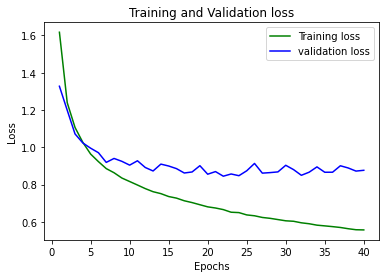

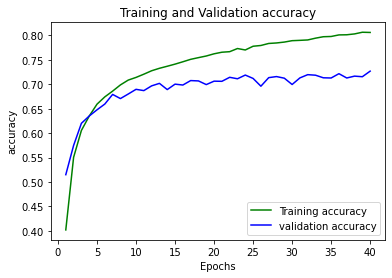

In [ ]:
## Accuracy and Loss plots

EPOCH=40
epochs = range(1,EPOCH+1)

## Loss Vs Epochs
loss_train = MODEL_2.history['loss']
loss_val = MODEL_2.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Accuracy Vs Epochs
Acc_train = MODEL_2.history['accuracy']
Acc_val = MODEL_2.history['val_accuracy']
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### - With the reduced trainable parameters the model overfits with the increase in number of epochs. 

### 7. CNN model 3: Adding few more layers with Batch Normalization and dropout to mitigate the problem of overfitting and achieve a balanced results for training and validation datasets.


1. Input shape: 32 x 32 , 3 channel


2. Layer 1: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Padding: same
    - Stride: 1
    
    
3. Layer 2: Convolution
    - Number of Filters: 32
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: same
    - Stride: 1
    
    
4. Layer 3: Convolution
    - Number of Filters: 64
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Padding: same
    - Stride: 1


5. Layer 4: Convolution
    - Number of Filters: 64
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: same
    - Stride: 1
    
    
5. Layer 5: Convolution
    - Number of Filters: 128
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Padding: same
    - Stride: 1
    
    
6. Layer 6: Convolution
    - Number of Filters: 128
    - Kernel size: 3 x 3
    - Activation function: Relu
    - Pooling: 2
    - Padding: same
    - Stride: 1
    

7. Layer 7: Neural network
    - Dense layer units: 128
    - Softmax output units: 10 

In [ ]:
# model architecture building

model_3 = Sequential()

model_3.add(Convolution2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model_3.add(BatchNormalization())

model_3.add(Convolution2D(32, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.3))

model_3.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())

model_3.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))

model_3.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())

model_3.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))

model_3.add(Flatten())

# fully connected layer
model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

# Classification layer
model_3.add(Dense(units=10, activation='softmax'))   

In [ ]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
Model_3 = model_3.fit(train_X, train_Y, batch_size=62, epochs = 30, validation_data = (test_X, test_Y), initial_epoch=0 )

Epoch 1/30
807/807 [==============================] - 181s 224ms/step - loss: 1.1605 - accuracy: 0.5884 - val_loss: 1.0206 - val_accuracy: 0.6433
Epoch 2/30
807/807 [==============================] - 178s 220ms/step - loss: 0.9865 - accuracy: 0.6548 - val_loss: 0.8845 - val_accuracy: 0.6917
Epoch 3/30
807/807 [==============================] - 189s 234ms/step - loss: 0.8777 - accuracy: 0.6930 - val_loss: 0.7364 - val_accuracy: 0.7416
Epoch 4/30
807/807 [==============================] - 187s 232ms/step - loss: 0.8046 - accuracy: 0.7202 - val_loss: 0.7843 - val_accuracy: 0.7228
Epoch 5/30
807/807 [==============================] - 190s 235ms/step - loss: 0.7566 - accuracy: 0.7404 - val_loss: 0.8547 - val_accuracy: 0.7077
Epoch 6/30
807/807 [==============================] - 180s 223ms/step - loss: 0.7093 - accuracy: 0.7553 - val_loss: 0.5978 - val_accuracy: 0.7970
Epoch 7/30
807/807 [==============================] - 176s 218ms/step - loss: 0.6715 - accuracy: 0.7695 - val_loss: 0.6668 -

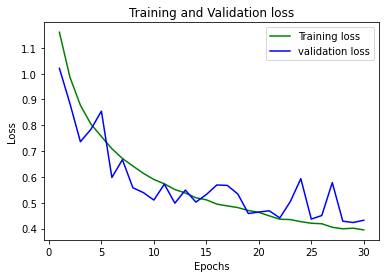

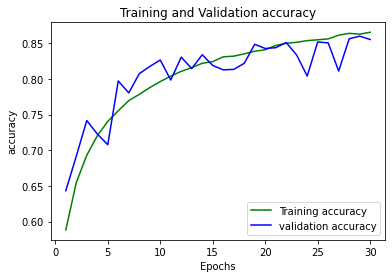

In [ ]:
# Accuracy and Loss plots

EPOCH=30
epochs = range(1,EPOCH+1)

# Loss Vs Epochs
loss_train = Model_3.history['loss']
loss_val = Model_3.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Vs Epochs
Acc_train = Model_3.history['accuracy']
Acc_val = Model_3.history['val_accuracy']
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### - With the addition of dropout the overfitting reduced, but the model is oscillating and trying to settle. The oscillations can be reduced by varying the learning rate and batch size.

### 8. Save the best performing model.

In [ ]:
# Saving the model
model_3.save('cnn.h5')
model_3.save_weights('cnn_weights.h5')

### 9. Load the saved model along with its weights.

In [ ]:
from tensorflow.keras.models import load_model
model_cnn_normalized = load_model('cnn.h5')
model_cnn_normalized.load_weights('cnn_weights.h5')

### 10. Predicting and vizualizing the test image.

#### Different classes
- airplane : 0
- automobile : 1
- bird : 2
- cat : 3
- deer : 4
- dog : 5
- frog : 6
- horse : 7
- ship : 8
- truck : 9

1/1 [==============================] - 0s 251ms/step


Softmax Outputs: [[4.5992146e-04 8.2362944e-04 5.7446858e-04 1.0271713e-02 2.0959899e-04
  2.4969836e-03 1.4758379e-03 9.7309589e-01 1.3363095e-04 1.0458409e-02]]


Predicted_Label: 7


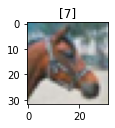

In [ ]:
plt.figure(figsize=[1.5,1.5])
n = 17
plt.title(test_Y[n])
plt.imshow(test_X[n])
y_pred = model_cnn_normalized.predict(test_X[n].reshape(1,32,32,3))
print('\n')
print("Softmax Outputs:",y_pred)

# Convert the predicted probabilities to labels
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  ## This is the order in which the dataset is read
for i in y_pred:
    for j, k in enumerate(i):
        if k == y_pred.max():
            print('\n')
            print('Predicted_Label:', labels[j])

#### As we can observe the Target class is 7(Horse) and the model Predicted as label 7 (Horse).

-------
### Happy Learning:)
-------